# Big Data Mart Sales Problem

#### Problem Statement: 

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

bigdatamart_Train.csv: Use this file for the model building purpose.

bigdatamart_Test.csv: Use this file for getting predictions from the trained model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

In [3]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


### Exploratory Data Analysis 

In [5]:
df_train.shape

(8523, 12)

In [6]:
df_test.shape

(5681, 11)

We can see their is 8523 rows, 11 columns and on looking at the dataset the label is not available in the test data.
hence the model will be built with the train data and the accuracy score will be compared with the test data.

In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

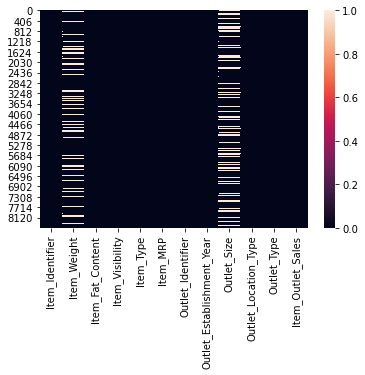

In [8]:
sns.heatmap(df_train.isnull())

Here we can clearly see that the presence of white lines indicates the missing values in the columns.

In [9]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


The dataset contains 12 attributes in which 11 are input attributes and remaining one is the output attribute that is "Item_Outlet_Sales" which we need to predict. It is a regression type problem since our target variable has continuous data. The dataset contains both numerical and categorical data type.

Here Item_Identifier and Outlet_Identifier has taken on the basis of indexing purpose and it has nothing to do with our model building so we can drop these columns later.

Categorical features:

Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Identifier(alphanumeric data), Outlet_Identifier(alphanumeric data) Numerical columns:

Continuous data type

Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales Descrete data type, Outlet_Establishment_Year

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [13]:
# Checking unique values in each column
df_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

These are the unique values present in each columns.

In [14]:
df_test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

## Statistical Analysis of the Dataset 

In [15]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

Here we can observe the count of the feature Item_Weight has 7060 which means there are missing values present. The average weight of the product is 12, maximum weight is 21 and minimum is 4 which means the data looks normal in this case. In summarising the data we can also see that the dataset seems to be having more outliers as well as skewness in the data. The column Item_MRP and Outlet_Establishment_Year have huge outliers from the max of 266 and 2009 respectively. We will remove this skewness and outliers before building the models. These difference can also be seen in the Item_Outlet_Sales, since it is target variable so no need to worry about it as we are going to predict it.

In [16]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## Handling missing values 

In [17]:
# Filling 'Item_Weight' with the mean of the columns as it is float.

df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(),inplace=True)  # Filling for Train Data
df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(),inplace=True)    # Filling for Test Data

In [18]:
# Checking Null values in "Item_Weight" after Filling in Train Dataset

df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
# Checking Null values in "Item_Weight" after filling in Test Dataset

df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [21]:
# Checking whether total count of the values matches with the other features without null values in Train Dataset.

df_train["Item_Weight"].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [22]:
# Checking whether total count of the values matches with the other features without null values in Test Dataset.

df_test["Item_Weight"].describe()

count    5681.000000
mean       12.695633
std         4.245189
min         4.555000
25%         9.195000
50%        12.695633
75%        15.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [24]:
# Filling 'Outlet_Size' with mode(most occured value) as it is a categorical value.

df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [26]:
df_train["Outlet_Size"].fillna(df_train["Outlet_Size"].mode()[0],inplace=True)
df_test["Outlet_Size"].fillna(df_test["Outlet_Size"].mode()[0],inplace=True)

In [27]:
# Checking for the 'Outlet_Size' after filling the data for null values in Train Dataset.

df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
#Checking for the 'Outlet_Size' after filling the data for null values in Test Dataset.

df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [30]:
# Checking The total counts matches with the other features in the train dataset.
df_train["Outlet_Size"].describe()

count       8523
unique         3
top       Medium
freq        5203
Name: Outlet_Size, dtype: object

In [31]:
# Checking The total counts matches with the other features in the test dataset.
df_test["Outlet_Size"].describe()

count       5681
unique         3
top       Medium
freq        3468
Name: Outlet_Size, dtype: object

### Selecting Feature based on general requirements 

In [32]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [34]:
df_train.shape

(8523, 10)

In [35]:
df_test.shape

(5681, 9)

In [36]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


## Data Visualization 

### Univariant Analysis 

In [38]:
# Checking the value count of Item_Fat_content in Train Dataset.
print(df_train["Item_Fat_Content"].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


This is a categorical data in which LF and Low fat classes belongs to Low Fat and reg belongs to Regular. So I am going to replace these classes with their respective categories.

In [40]:
df_train["Item_Fat_Content"]= df_train["Item_Fat_Content"].replace('LF','Low Fat')
df_train["Item_Fat_Content"]= df_train["Item_Fat_Content"].replace('low fat','Low Fat')
df_train["Item_Fat_Content"]= df_train["Item_Fat_Content"].replace('reg','Regular')

In [42]:
print(df_test["Item_Fat_Content"].value_counts())

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


In [43]:
df_test["Item_Fat_Content"]= df_test["Item_Fat_Content"].replace('LF','Low Fat')
df_test["Item_Fat_Content"]= df_test["Item_Fat_Content"].replace('low fat','Low Fat')
df_test["Item_Fat_Content"]= df_test["Item_Fat_Content"].replace('reg','Regular')

Now this has replaced LF,low fat by Low Fat and reg by Regular for both train and test dataset

Train Dataset
 Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Text(0.5, 1.0, 'Train Dataset')

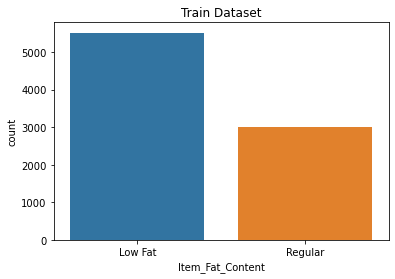

In [44]:
# Checking the Value Counts of the Item_Fat_Content.
print("Train Dataset\n",df_train["Item_Fat_Content"].value_counts())

# Visualise the Value Counts of Item_Fat_Content.
sns.countplot(df_train["Item_Fat_Content"])
plt.title("Train Dataset")

From this visualization we can observe that most of the products are Low fat content and very few are regular. This means if we produce low fat items then Sales also increases.

Test Dataset
 Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


Text(0.5, 1.0, 'Test Dataset')

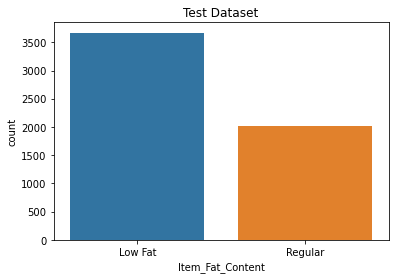

In [45]:
# Checking the Value Counts of the Item_Fat_Content.
print("Test Dataset\n",df_test["Item_Fat_Content"].value_counts())

# Visualise the Value Counts of Item_Fat_Content.
sns.countplot(df_test["Item_Fat_Content"])
plt.title("Test Dataset")

From this visualization we can observe that most of the products are Low fat content and very few are regular. This means if we produce low fat items then Sales also increases.

In [47]:
# Lets Check the Value Count of Item_Type
df_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Text(0.5, 1.0, 'Item Type')

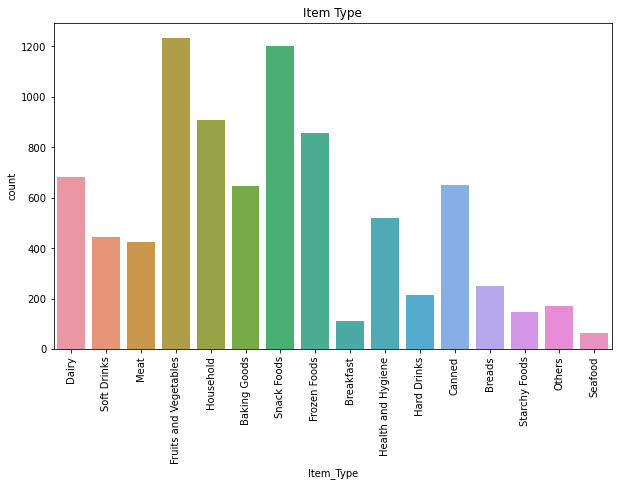

In [49]:
# Visualize the count of Item_Type

plt.figure(figsize=(10,6))
sns.countplot(df_train["Item_Type"])
plt.xticks(rotation=90)
plt.title("Item Type")

It can be clearly seen that Fruits and Vegetables have high value counts followed by Snacks Foods, Household etc.

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Text(0.5, 1.0, 'Outlet Size')

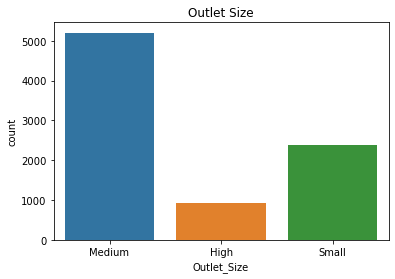

In [50]:
# Visualize the count of Outlet Size.
print(df_train["Outlet_Size"].value_counts())
sns.countplot(df_train["Outlet_Size"])
plt.title("Outlet Size")

It can be clearly seen that Medium has high values. 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


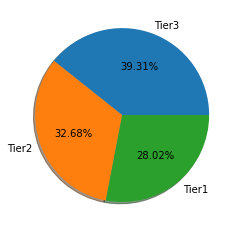

In [52]:
# Visualize the count of the Outlet_Location_Type
print(df_train["Outlet_Location_Type"].value_counts())
labels = 'Tier3','Tier2','Tier1'
fig,ax = plt.subplots()
ax.pie(df_train["Outlet_Location_Type"].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

It clearly shows that Tier 3 has highest Outlets.

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


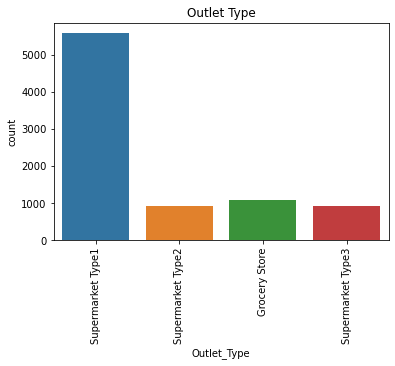

In [53]:
# Checking the Value Count of Outlet_Type
print(df_train["Outlet_Type"].value_counts())

# Visualize the Value Count of Outlet_Type
sns.countplot(df_train["Outlet_Type"])
plt.xticks(rotation=90)
plt.title("Outlet Type")
plt.show()

## Label Encoding 

In [54]:
from sklearn.preprocessing import LabelEncoder, power_transform
from sklearn.preprocessing import MinMaxScaler

In [56]:
LE = LabelEncoder()
df_train["Item_Fat_Content"] = LE.fit_transform(df_train["Item_Fat_Content"])
df_train["Item_Type"] = LE.fit_transform(df_train["Item_Type"])
df_train["Outlet_Size"] = LE.fit_transform(df_train["Outlet_Size"])
df_train["Outlet_Location_Type"] = LE.fit_transform(df_train["Outlet_Location_Type"])
df_train["Outlet_Type"] = LE.fit_transform(df_train["Outlet_Type"])

In [57]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [58]:
df_test["Item_Fat_Content"] = LE.fit_transform(df_test["Item_Fat_Content"])
df_test["Item_Type"] = LE.fit_transform(df_test["Item_Type"])
df_test["Outlet_Size"] = LE.fit_transform(df_test["Outlet_Size"])
df_test["Outlet_Location_Type"] = LE.fit_transform(df_test["Outlet_Location_Type"])
df_test["Outlet_Type"] = LE.fit_transform(df_test["Outlet_Type"])
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2007,1,1,1
2,14.600000,0,0.099575,11,241.7538,1998,1,2,0
3,7.315000,0,0.015388,13,155.0340,2007,1,1,1
4,12.695633,1,0.118599,4,234.2300,1985,1,2,3


## Checking Co-relation 

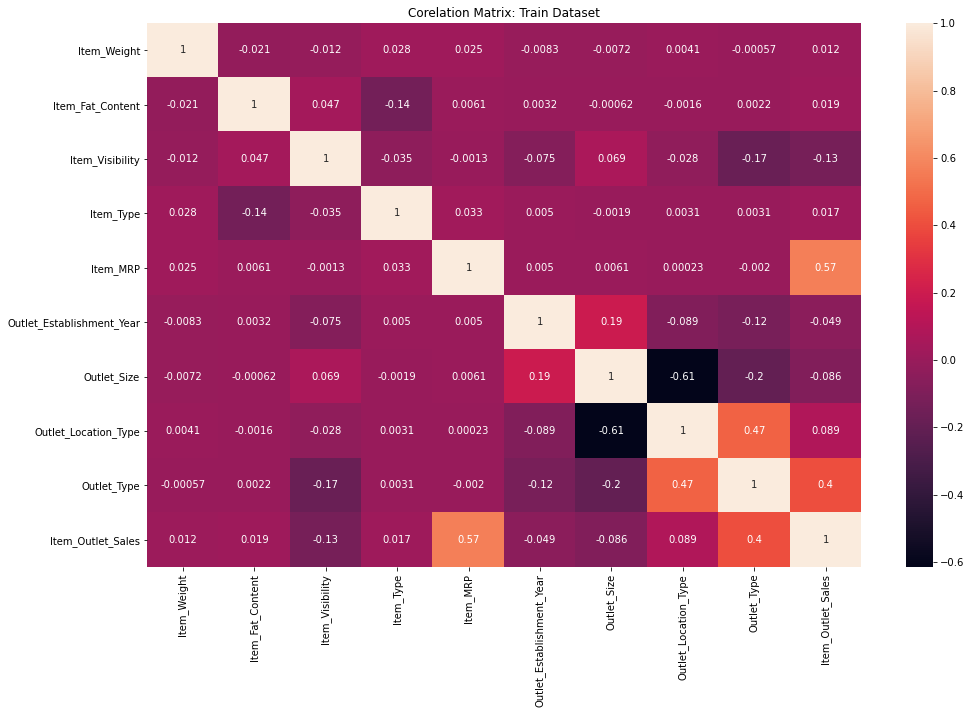

In [59]:
corr_train = df_train.corr()
corr_train

plt.figure(figsize=(16,10))
sns.heatmap(corr_train,annot=True,linecolor='black')
plt.title("Corelation Matrix: Train Dataset")
plt.show()

Item MRP shows highest corelation with Sales, then outlet_type, also outlet size has highest negative corelation.

## Checking normal distribution of features 

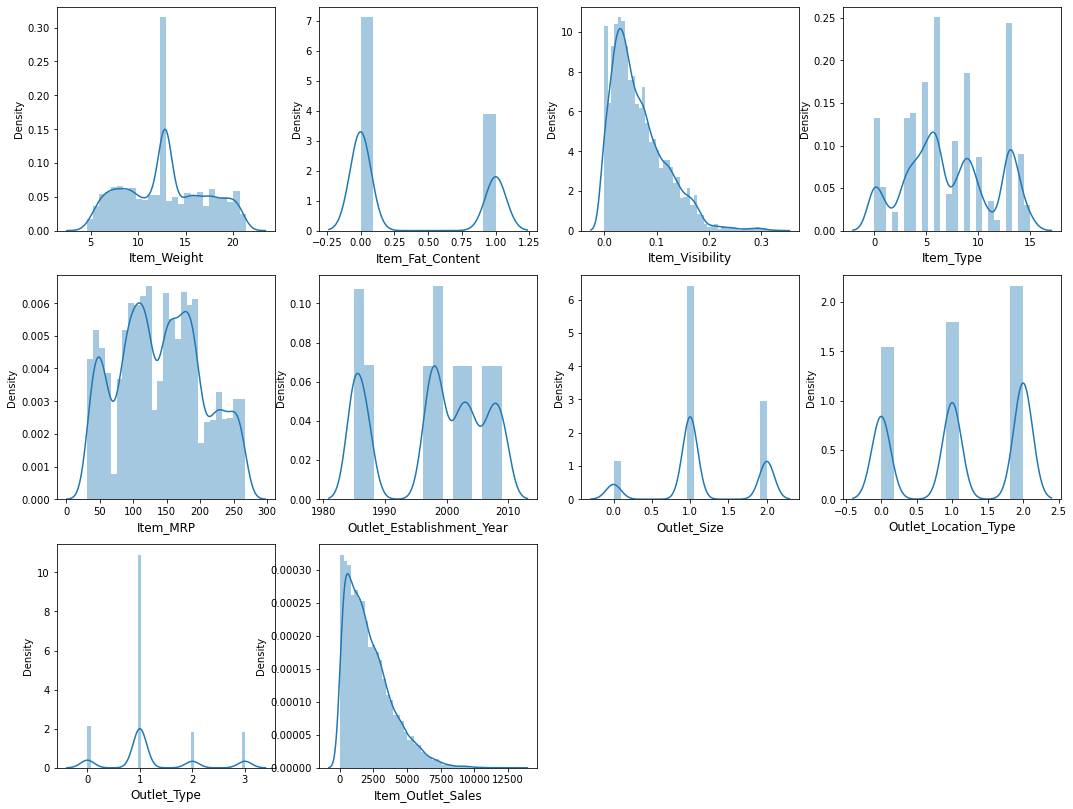

In [62]:
plt.figure(figsize=(18,14), facecolor='White')
plotnumber=1

for column in df_train:
    if plotnumber<=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df_train[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.show()


 1. Data has skewness and looks like has outliers.

 2.Will check for the skewness and handle skewness

 3.Will check for the outliers and check if needs to be removed

### Checking for skewness and handling skewness 

In [63]:
# Checking Skewness for Train Dataset Features.

df_train.skew().sort_values()

Outlet_Establishment_Year   -0.396641
Outlet_Location_Type        -0.209093
Outlet_Size                 -0.087072
Item_Weight                  0.090561
Item_Type                    0.101655
Item_MRP                     0.127202
Item_Fat_Content             0.616705
Outlet_Type                  0.927438
Item_Visibility              1.167091
Item_Outlet_Sales            1.177531
dtype: float64

In [64]:
# Removing Skewness converting to DataFrame and Assigning to x again.

x_new = power_transform(df_train)
df_train = pd.DataFrame(x_new,columns=df_train.columns)

In [65]:
# Validating if the Skewness is removed.

df_train.skew().sort_values(ascending=False)

Item_Fat_Content             0.616705
Item_Visibility              0.124279
Outlet_Type                  0.007863
Outlet_Size                 -0.042980
Item_Weight                 -0.068024
Item_Outlet_Sales           -0.074791
Item_MRP                    -0.115386
Item_Type                   -0.164574
Outlet_Establishment_Year   -0.200959
Outlet_Location_Type        -0.220632
dtype: float64

In [66]:
df_train.skew()[np.abs(df_train.skew())<0.25].all()

True

Skewness has been removed from Train dataset

In [67]:
#Checking for test dataset, as this dataset does not have label, hence no need to divide

df_test.skew().sort_values(ascending=False)

Item_Visibility              1.238312
Outlet_Type                  0.927446
Item_Fat_Content             0.609223
Item_Weight                  0.142813
Item_MRP                     0.136182
Item_Type                    0.096486
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Establishment_Year   -0.396306
dtype: float64

In [68]:
# Remoing Skewness and converting to DataFrame and assigning to df_test again.

df = power_transform(df_test)
df_test = pd.DataFrame(df,columns=df_test.columns)

In [69]:
df_test.skew().sort_values(ascending=False)

Item_Fat_Content             0.609223
Item_Visibility              0.116776
Outlet_Type                  0.007830
Outlet_Size                 -0.042981
Item_Weight                 -0.060915
Item_MRP                    -0.111040
Item_Type                   -0.167431
Outlet_Establishment_Year   -0.200515
Outlet_Location_Type        -0.220642
dtype: float64

In [70]:
# Removed Skewness from The Test Dataset.

df_test.skew()[np.abs(df_test.skew())<0.25].all()

True

## Checking for Outliers 

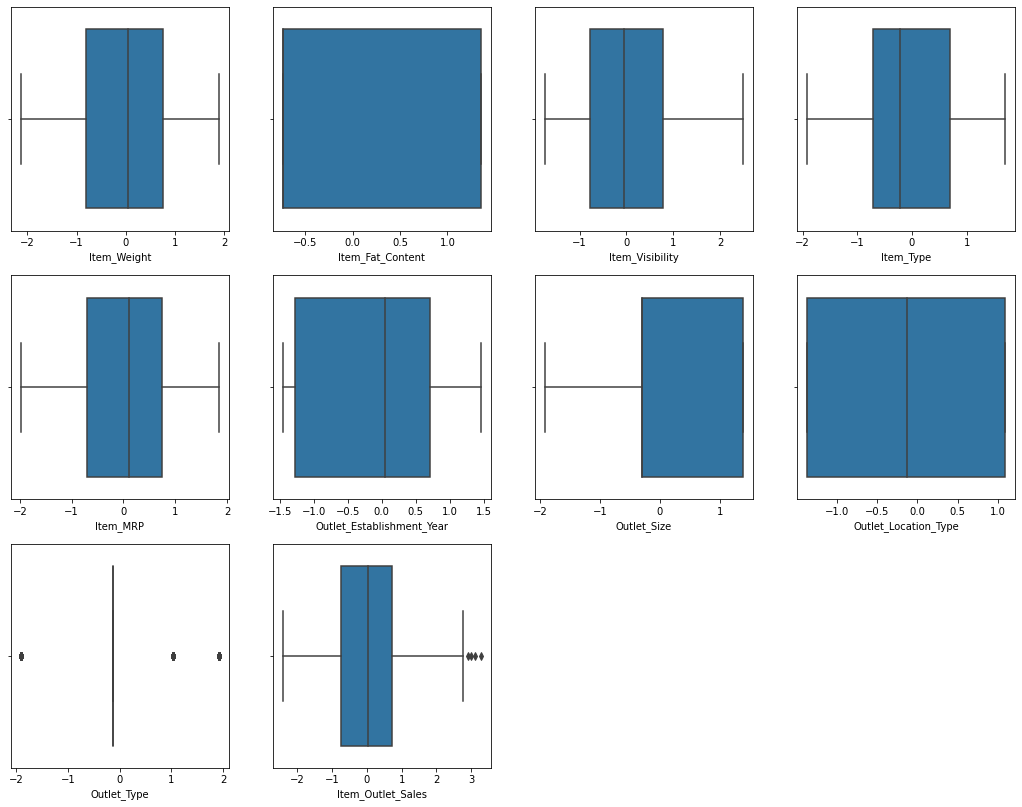

In [72]:
# Checking Outliers for Train Dataset

plt.figure(figsize=(18,14))
graph = 1

for column in df_train:
    if graph <=10:
        ax = plt.subplot(3,4,graph)
        sns.boxplot(df_train[column], orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

### Removing Outliers 

In [74]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [75]:
(np.abs(zscore(df_train))<5).all()

True

In [76]:
item = df_train[["Outlet_Type"]]

In [77]:
z = np.abs(zscore(item))
z

array([[0.12348771],
       [1.04059102],
       [0.12348771],
       ...,
       [0.12348771],
       [1.04059102],
       [0.12348771]])

Outliers have been removed.

In [78]:
new_df = df_train[(z<3).all(axis=1)]
new_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.822636,-0.738147,-1.146886,-0.712347,1.623670,0.048562,-0.293295,-1.373843,-0.123488,0.985078
1,-1.733801,1.354743,-1.037100,1.504660,-1.595016,1.461925,-0.293295,1.088324,1.040591,-1.218135
2,1.086362,-0.738147,-1.122375,0.684390,0.081237,0.048562,-0.293295,-1.373843,-0.123488,0.220360
3,1.447728,1.354743,-1.745551,-0.215420,0.689968,-0.075796,-0.293295,1.088324,-1.915952,-0.835183
4,-0.917588,-0.738147,-1.745551,0.468410,-1.476078,-1.270835,-1.925925,1.088324,-0.123488,-0.566616
...,...,...,...,...,...,...,...,...,...,...
8518,-1.468096,-0.738147,0.020310,1.305304,1.148258,-1.270835,-1.925925,1.088324,-0.123488,0.573946
8519,-1.060659,1.354743,-0.221388,-1.923750,-0.463127,0.439191,-0.293295,-0.131113,-0.123488,-1.062855
8520,-0.496556,-0.738147,-0.542979,0.246996,-0.867930,0.714912,1.390694,-0.131113,-0.123488,-0.393044
8521,-1.373443,1.354743,1.459990,1.305304,-0.548996,1.461925,-0.293295,1.088324,1.040591,0.070669


In [79]:
df_train.shape

(8523, 10)

In [80]:
new_df.shape

(8523, 10)

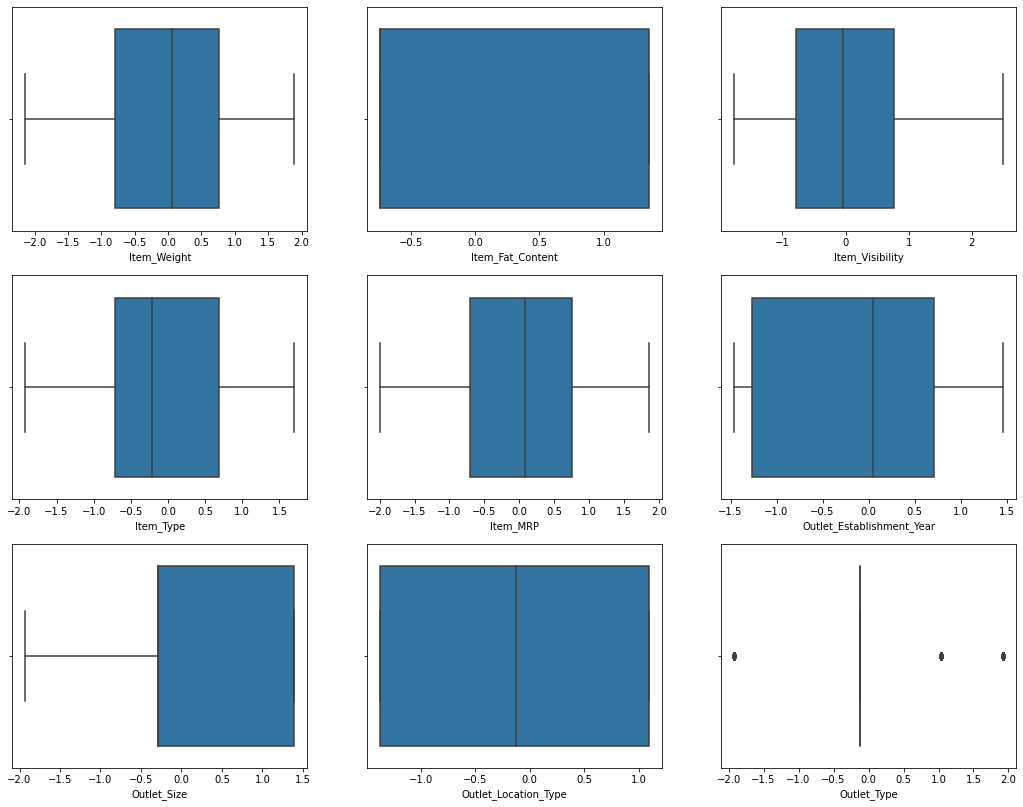

In [81]:
# Checking for Outliers in Test Dataset

plt.figure(figsize=(18,14))
graph=1

for column in df_test:
    if graph<=9:
        ax = plt.subplot(3,3,graph)
        sns.boxplot(df_test[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()    

## Removing Outliers 

In [82]:
z = np.abs(zscore(df_test[["Outlet_Type"]]))
new_dff = df_test[(z<3).all(axis=1)]
new_dff

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.770074,-0.740811,-1.462069,1.301686,-0.472017,0.048870,-0.293457,-1.373745,-0.123533
1,-1.036193,1.349873,-0.448019,-0.712433,-0.835998,1.153252,-0.293457,-0.131020,-0.123533
2,0.491675,-0.740811,0.871342,0.892240,1.525375,-0.075491,-0.293457,1.088300,-1.915753
3,-1.306479,-0.740811,-1.175927,1.301686,0.290835,1.153252,-0.293457,-0.131020,-0.123533
4,0.059211,1.349873,1.153823,-0.712433,1.424528,-1.457044,-0.293457,1.088300,1.922271
...,...,...,...,...,...,...,...,...,...
5676,-0.468330,1.349873,-1.243150,1.301686,0.077563,-0.197031,1.390590,-1.373745,-0.123533
5677,-1.227105,1.349873,1.453584,1.696978,0.504137,1.462369,-0.293457,1.088300,1.040210
5678,-0.593556,-0.740811,0.397868,0.244553,-0.288074,0.439518,-0.293457,-0.131020,-0.123533
5679,0.645629,1.349873,-1.760234,-0.978099,1.156802,1.153252,-0.293457,-0.131020,-0.123533


Outliers has been Removed.

In [84]:
(np.abs(zscore(df_test))<5).all()

True

### Splitting the data for train dataset for features and label 

In [85]:
# Divided the Data for Train Dataset into feature and label
x=new_df.drop("Item_Outlet_Sales",axis=1)
y=new_df["Item_Outlet_Sales"]

In [86]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.822636,-0.738147,-1.146886,-0.712347,1.623670,0.048562,-0.293295,-1.373843,-0.123488
1,-1.733801,1.354743,-1.037100,1.504660,-1.595016,1.461925,-0.293295,1.088324,1.040591
2,1.086362,-0.738147,-1.122375,0.684390,0.081237,0.048562,-0.293295,-1.373843,-0.123488
3,1.447728,1.354743,-1.745551,-0.215420,0.689968,-0.075796,-0.293295,1.088324,-1.915952
4,-0.917588,-0.738147,-1.745551,0.468410,-1.476078,-1.270835,-1.925925,1.088324,-0.123488


In [87]:
y.value_counts()

-0.600439    17
-0.274662    16
 0.070669    15
-0.868889    15
-0.324287    14
             ..
 2.715051     1
 0.017392     1
 1.972718     1
 0.882425     1
 0.115539     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

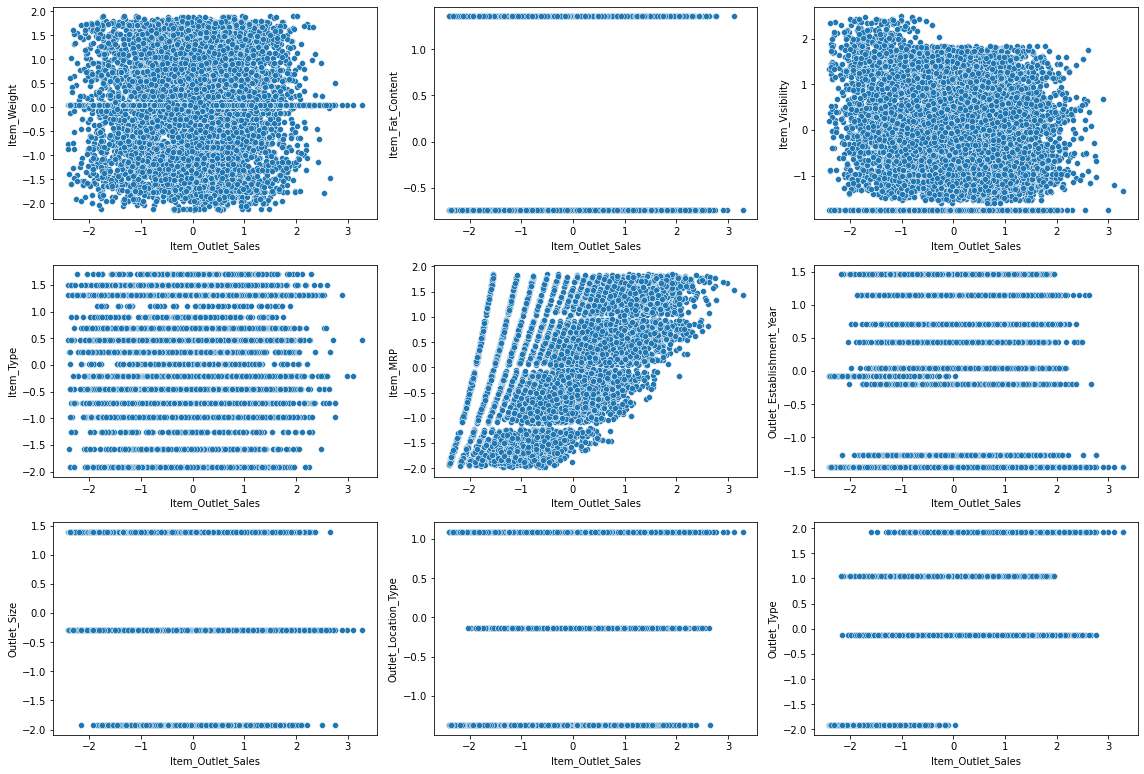

In [88]:
# Relation Between Feature and Label

plt.figure(figsize=(16,14), facecolor="white")
plotnumber=1

for column in x:
    if plotnumber<=10:
        ax = plt.subplot(4,3,plotnumber)
        sns.scatterplot(y,x[column])
    plotnumber+=1
plt.tight_layout()    

Good Relation Between Feature and Label.

### Data PreProcesing

## Scaling data using MinMaxScaler for Train Dataset 

In [89]:
MMS = MinMaxScaler()
x_scaled = pd.DataFrame(MMS.fit_transform(x), columns=x.columns)
x_scaled

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.326234,0.0,0.141313,0.334227,0.941878,0.515867,0.492257,0.00000,0.466916
1,0.100114,1.0,0.167227,0.945900,0.101813,1.000000,0.492257,1.00000,0.770145
2,0.799982,0.0,0.147098,0.719587,0.539309,0.515867,0.492257,0.00000,0.466916
3,0.889661,1.0,0.000000,0.471329,0.698186,0.473269,0.492257,1.00000,0.000000
4,0.302670,0.0,0.000000,0.659998,0.132855,0.063921,0.000000,1.00000,0.466916
...,...,...,...,...,...,...,...,...,...
8518,0.166053,0.0,0.416825,0.890898,0.817798,0.063921,0.000000,1.00000,0.466916
8519,0.267165,1.0,0.359773,0.000000,0.397232,0.649673,0.492257,0.50473,0.466916
8520,0.407156,0.0,0.283862,0.598910,0.291580,0.744118,1.000000,0.50473,0.466916
8521,0.189542,1.0,0.756655,0.890898,0.374820,1.000000,0.492257,1.00000,0.770145


### Scaling data using MinMaxScaler for Test Dataset 

In [90]:
xt_scaled = pd.DataFrame(MMS.fit_transform(x), columns=x.columns)
xt_scaled

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.326234,0.0,0.141313,0.334227,0.941878,0.515867,0.492257,0.00000,0.466916
1,0.100114,1.0,0.167227,0.945900,0.101813,1.000000,0.492257,1.00000,0.770145
2,0.799982,0.0,0.147098,0.719587,0.539309,0.515867,0.492257,0.00000,0.466916
3,0.889661,1.0,0.000000,0.471329,0.698186,0.473269,0.492257,1.00000,0.000000
4,0.302670,0.0,0.000000,0.659998,0.132855,0.063921,0.000000,1.00000,0.466916
...,...,...,...,...,...,...,...,...,...
8518,0.166053,0.0,0.416825,0.890898,0.817798,0.063921,0.000000,1.00000,0.466916
8519,0.267165,1.0,0.359773,0.000000,0.397232,0.649673,0.492257,0.50473,0.466916
8520,0.407156,0.0,0.283862,0.598910,0.291580,0.744118,1.000000,0.50473,0.466916
8521,0.189542,1.0,0.756655,0.890898,0.374820,1.000000,0.492257,1.00000,0.770145


### Using Train test Split 

In [105]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

In [96]:
maxAccu = 0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predLR = LR.predict(x_test)
    acc = r2_score(y_test,predLR)
    if acc> maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on Random State",maxRS)

Best Accuracy is 0.6673711507642297 on Random State 76


## Splitting data into training and testing set 

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.1,random_state=maxRS)

In [98]:
# Checking The Data Distribution
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7670, 9)
(7670,)
(853, 9)
(853,)


### Modelling

In [114]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#### Baseline Model : Multiple Linear Regression 

In [103]:
LR = LinearRegression()
LR.fit(x_train,y_train)rif

pred_LR = LR.predict(x_test)
LR_r2 = r2_score(y_test,pred_LR)
print(f'Adjusted r2 Score:{LR_r2}')

print("The Mean Absolute Error is:",metrics.mean_absolute_error(y_test,pred_LR))
print("The Mean Squared Error is:",metrics.mean_squared_error(y_test,pred_LR))
print("The Root Mean Square Error is:",np.sqrt(metrics.mean_squared_error(y_test,pred_LR)))

Adjusted r2 Score:0.6673711507642297
The Mean Absolute Error is: 0.46668088821201986
The Mean Squared Error is: 0.3366941153749205
The Root Mean Square Error is: 0.5802534923418562


#### Multiple Linear Regression with Ridge Regression 

In [110]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [111]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [112]:
ridge_model.score(x_test,y_test)

0.6673711573762666

#### Multiple Linear Regression with Lasso Regression

In [115]:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [116]:
alpha = lasscv.alpha_
alpha

6.349632644915971e-06

In [117]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=6.349632644915971e-06)

In [118]:
lasso_reg.score(x_test,y_test)

0.6673749280322481

###  Random Forest Regressor 

In [119]:
RF = RandomForestRegressor()
parameters = {'n_estimators':[int(x)for x in np.linspace(100,2000,10)]}

In [120]:
RF_regressor = GridSearchCV(RF,parameters,scoring='neg_mean_squared_error',cv=5)

In [121]:
RF_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 311, 522, 733, 944, 1155, 1366,
                                          1577, 1788, 2000]},
             scoring='neg_mean_squared_error')

In [122]:
print(RF_regressor.best_params_)

{'n_estimators': 1788}


In [124]:
print(-RF_regressor.best_score_)

0.34300484269786313


In [125]:
RF_reg = RandomForestRegressor(n_estimators=1788)
RF_reg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1788)

In [127]:
RF_reg_pred = RF_reg.predict(x_test)
test_rmse = metrics.mean_squared_error(y_test,RF_reg_pred,squared=False)
print(f'Test RMSE:{test_rmse}')

Test RMSE:0.5525363226953344


### AdaBoost Regressor 

In [128]:
ABR = AdaBoostRegressor()
ABR.fit(x_train,y_train)

AdaBoostRegressor()

In [129]:
predABR = ABR.predict(x_test)
print("The r2 Score is:",r2_score(y_test,predABR))
print("The Mean Absolute Error is:",metrics.mean_absolute_error(y_test,predABR))
print("The Mean Squared Error is:",metrics.mean_squared_error(y_test,predABR))
print("The Root Mean Square Error is:",np.sqrt(metrics.mean_squared_error(y_test,predABR)))

The r2 Score is: 0.6809846771932164
The Mean Absolute Error is: 0.443081655355009
The Mean Squared Error is: 0.32291420948680605
The Root Mean Square Error is: 0.5682554086736052


### Gradient Boosting Regressor

In [130]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [131]:
predGBR = GBR.predict(x_test)
print("The r2 Score is:",r2_score(y_test,predGBR))
print("The Mean Absolute Error is:",metrics.mean_absolute_error(y_test,predGBR))
print("The Mean Squared Error is:",metrics.mean_squared_error(y_test,predGBR))
print("The Root Mean Square Error is:",np.sqrt(metrics.mean_squared_error(y_test,predGBR)))

The r2 Score is: 0.7242728057718859
The Mean Absolute Error is: 0.4110256164502389
The Mean Squared Error is: 0.2790970294931965
The Root Mean Square Error is: 0.5282963462803775


### KNearest Neighbor Regressor 

In [132]:
KNN = KNN()
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [133]:
predKNN = KNN.predict(x_test)
print("The r2 Score is:",r2_score(y_test,predKNN))
print("The Mean Absolute Error is:",metrics.mean_absolute_error(y_test,predKNN))
print("The Mean Squared Error is:",metrics.mean_squared_error(y_test,predKNN))
print("The Root Mean Square Error is:",np.sqrt(metrics.mean_squared_error(y_test,predKNN)))

The r2 Score is: 0.680148810631482
The Mean Absolute Error is: 0.446766777545867
The Mean Squared Error is: 0.32376029169892084
The Root Mean Square Error is: 0.5689993775909784


### Cross Validation Score

In [134]:
print("The Cross Validation Score of Linear Regression is:",cross_val_score(LR,x_scaled,y,cv=5).mean())
print("The Cross Validation Score of Linear Regression with Ridge is:",cross_val_score(ridge_model,x_scaled,y,cv=5).mean())
print("The Cross Validation Score of Linear Regression with Lasso is:",cross_val_score(lasso_reg,x_scaled,y,cv=5).mean())
print("The Cross Validation Score of Random Forest Regressor is:",cross_val_score(RF,x_scaled,y,cv=5).mean())
print("The Cross Validation Score of AdaBoost Regressor is:",cross_val_score(ABR,x_scaled,y,cv=5).mean())
print("The Cross validation Score of Gradient Boosting Regressor is:",cross_val_score(GBR,x_scaled,y,cv=5).mean())
print("The Cross Validation Score of KNearest Neighbor Regressor is:",cross_val_score(KNN,x_scaled,y,cv=5).mean())

The Cross Validation Score of Linear Regression is: 0.6181594206529257
The Cross Validation Score of Linear Regression with Ridge is: 0.6181594277059412
The Cross Validation Score of Linear Regression with Lasso is: 0.6181600425438625
The Cross Validation Score of Random Forest Regressor is: 0.6571993760554433
The Cross Validation Score of AdaBoost Regressor is: 0.6573108957813267
The Cross validation Score of Gradient Boosting Regressor is: 0.6946038469958319
The Cross Validation Score of KNearest Neighbor Regressor is: 0.6237273610655205


#### GradientBoost is seen as the best fit model

### HyperParameter Tuning 

In [138]:
parameters = {'n_estimators':[50,200],
             'random_state':[2,3,4,5],
             'learning_rate':[0.01,0.022,0.05]}

In [139]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [140]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.022, 0.05],
                         'n_estimators': [50, 200],
                         'random_state': [2, 3, 4, 5]})

In [141]:
GCV.best_params_

{'learning_rate': 0.022, 'n_estimators': 200, 'random_state': 3}

In [142]:
Final_model = GradientBoostingRegressor(learning_rate=0.022, n_estimators=200, random_state=3)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print("The Root Mean Square Error is:",np.sqrt(metrics.mean_squared_error(y_test,predGBR)))
print("r2 Score is:",r2_score(y_test,pred)*100)

The Root Mean Square Error is: 0.5282963462803775
r2 Score is: 72.65460271614415


### Save The Model 

In [143]:
import joblib
joblib.dump(Final_model,'Big_Data_Mart_sales.pkl')

['Big_Data_Mart_sales.pkl']

### Loading the trained Model 

In [144]:
Model = joblib.load("Big_Data_Mart_sales.pkl")
Prediction = Model.predict(new_dff)
pred=pd.DataFrame(Prediction)
pred

,0
0,-2.086785
1,-2.250388
2,-1.071290
3,-1.657298
4,1.476316
...,...
5676,-2.034610
5677,0.354333
5678,-2.119536
5679,-1.124703


In [145]:
pred.to_csv('Item_Outlet_Sales.csv',index=False)